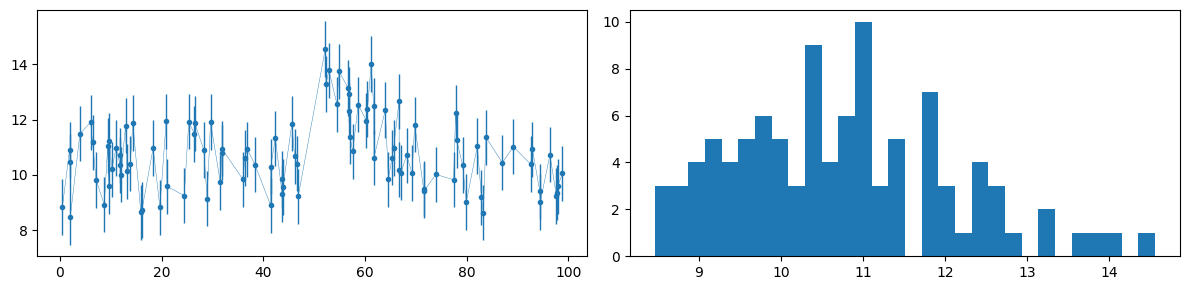

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

infile = '../solutions/transient.npy'
data = np.load(infile)
time, flux, yerr = data[:,0], data[:,1], data[:,2]
fig, axs = plt.subplots(1,2, tight_layout=True, figsize=(12,3))
axs[0].errorbar(time, flux, yerr=yerr, marker='.', lw=0.3, elinewidth=1); _ = axs[1].hist(data[:, 1], bins=30)

In [2]:
Model = lambda t, bkg, bAmpl, t0, alpha: bkg if t<t0 else bkg + bAmpl*np.exp(-alpha*(t-t0))

# Model = np.where(t<t0, bkg, bkg + bAmpl*np.exp(-alpha*(t-t0)))

### Setting Priors
from scipy import stats
Prior_bkg     = stats.uniform(loc=0, scale=50 )
Prior_bAmpl   = stats.uniform(loc=0, scale=50 )
Prior_t0      = stats.uniform(loc=0, scale=100)
Prior_lnalpha = stats.uniform(loc=-5, scale=10)

### Setting Likelihood
def Likelihood(time, flux, params):
    bkg, bAmpl, t0, alpha = params
    L = np.prod( [ 1 / np.sqrt( 2*np.pi*yerr[0]**2) * np.exp( -0.5/(yerr[0]**2)*(fl - Model(t, bkg, bAmpl, t0, alpha) )**2) 
                  for t, fl in zip(time, flux) ] )
    return L

def LogLikelihood(time, flux, params):
    bkg, bAmpl, t0, alpha = params
    logL = np.sum( -0.5/(yerr[0]**2)*(flux - [ Model(t, bkg, bAmpl, t0, alpha) for t in time] )**2 )
    return logL

from scipy.optimize import fmin_bfgs
def best_theta(model, data):
    theta_0 = [11, 5, 57, 1]
    return optimize.fmin_bfgs(LogLikelihood(data[0], data[1], theta_0), theta_0, disp=False)

In [5]:
import emcee
ndim =4; nwalkers = 4;
ivars = [11, 5, 57, 1]
p0 = Prior_bkg.pdf(np.linspace(0, 50, 1000)) * Prior_bAmpl.pdf(np.linspace(0, 50, 1000)) * Prior_t0.pdf(np.linspace(0,100,1000)) * Prior_lnalpha.pdf(np.logspace(-5, 5, 1000))
sampler = emcee.EnsembleSampler(nwalkers, ndim, LogLikelihood, args=ivars)
sampler.run_mcmc(p0, 4)

ValueError: incompatible input dimensions (1, 1000)

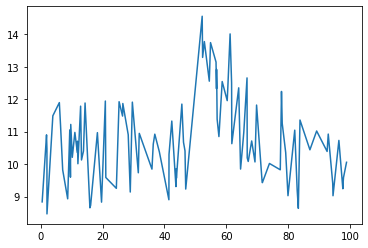

In [7]:
### Single Posterior distribution given dataset?
### Code up the model
### Code up the distributions 
### Pick something: emcee, pymc, and map the posterior
### Recover mcmc chain of the posterior. How many samples? How much burning? Tau?

### USE THE SAME PRIOR

### Once you have che chain, illustrate it!